#**Neural Network - A Simple Perceptron**
**Assignment Code: DS-AG-019**

**Q.1 What is Deep Learning? Briefly describe how it evolved and how it differs from traditional machine learning.**

→ A Deep Learning is a subfield of machine learning that uses multi-layered neural networks to automatically extract features & learn hierarchical representations from raw data.

Evolution:
- 1950s: Perceptron introduced (Rosenblatt).
- 1980s: Backpropagation enabled training of multi-layer networks.
- 2000s: Availability of GPUs, big data & algorithms (e.g., CNNs, RNNs).
- Today: Deep learning powers applications like speech recognition, autonomous vehicles & generative AI.

It differs from traditional machine learning as follows:
- Traditional ML: Relies on hand-crafted features & simpler models (SVM, decision trees).
- Deep Learning: Learns features automatically from raw input (images, text, audio).

**Q.2 Explain the basic architecture and functioning of a Perceptron. What are its limitations?**

→ Architecture:
- Inputs → Weights → Weighted Sum → Activation Function → Output.
- Formula:

  y = f( Σ (w_i * x_i) + b )

Functioning:
- Computes a weighted sum of inputs.
- Applies activation function (step or linear).
- Produces output (0 or 1 for binary tasks).

Limitations:
- Can only solve linearly separable problems (e.g., AND, OR).
- Fails on non-linear tasks (e.g., XOR).
- Limited learning capacity.

**Q.3 Describe the purpose of activation function in neural networks. Compare
Sigmoid, ReLU, and Tanh functions.**

→ The main purpose of Activation Function is to introduce non-linearity, enabling neural networks to learn complex patterns.

Comparison:
1. Sigmoid:
- Range (0,1), smooth.
- Problem: Vanishing gradient.
- Formula: sigmoid(x) = 1 / (1 + e^(-x))
- Use: Binary classification.
2. ReLU (Rectified Linear Unit):
- Range (0, ∞), simple & efficient.
- Problem: Dying ReLU (neurons stuck at 0).
- Formula: ReLU(x) = max(0, x)
- Use: Hidden layers in deep nets.
3. Tanh:
- Range (-1,1), centered at 0.
- Problem: Still suffers vanishing gradients.
- Formula: tanh(x) = (e^x - e^(-x)) / (e^x + e^(-x))
- Use: Better than sigmoid for hidden layers.

**Q.4 What is the difference between Loss function and Cost function in neural
networks? Provide examples.**

→ The difference between Loss function and Cost function in neural
networks are given below:
- Loss Function: Error for a single training sample.

  Ex.: Mean Squared Error (MSE), Binary Cross-Entropy.
- Cost Function: Average of loss function over the entire dataset.

  Ex.: Mean of MSE over all samples in training.

**Q.5 What is the role of optimizers in neural networks? Compare Gradient
Descent, Adam, and RMSprop.**

→ The main use of optimizers in neural networks is to adjust weights to minimize loss.

Comparison:
- Gradient Descent: Updates weights using entire dataset or mini-batches. Simple but can be slow.
- Adam (Adaptive Moment Estimation): Combines momentum & RMSprop. Fast convergence, widely used.
- RMSprop: Adapts learning rate per parameter. Good for non-stationary data.

**Q.6 Write a Python program to implement a single-layer perceptron from
scratch using NumPy to solve the logical AND gate.**

→

In [2]:
import numpy as np

X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([0,0,0,1])
w = np.zeros(2)
b = 0
lr = 0.1

for epoch in range(10):
    for i in range(len(X)):
        linear_output = np.dot(X[i], w) + b
        y_pred = 1 if linear_output > 0 else 0
        error = y[i] - y_pred
        w += lr * error * X[i]
        b += lr * error

for i in range(len(X)):
    result = 1 if (np.dot(X[i], w) + b) > 0 else 0
    print(f"Input: {X[i]} → Output: {result}")

Input: [0 0] → Output: 0
Input: [0 1] → Output: 0
Input: [1 0] → Output: 0
Input: [1 1] → Output: 1


**Q.7 Implement and visualize Sigmoid, ReLU, and Tanh activation functions
using Matplotlib.**

→

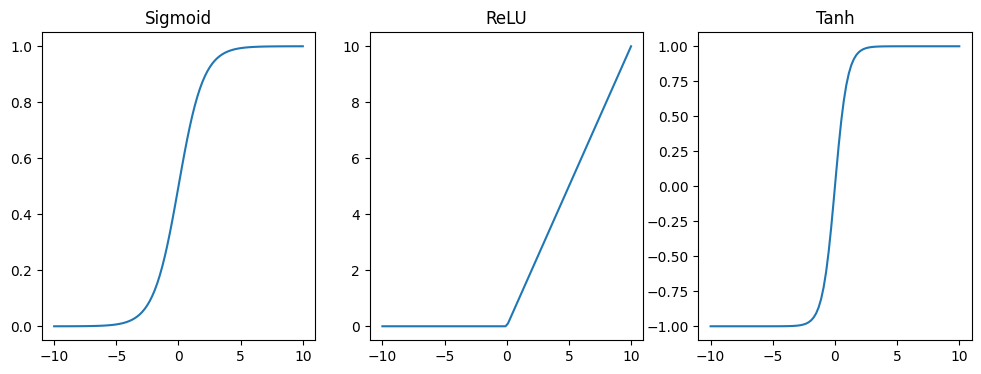

In [3]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 100)
sigmoid = 1/(1+np.exp(-x))
relu = np.maximum(0,x)
tanh = np.tanh(x)

plt.figure(figsize=(12,4))
plt.subplot(1,3,1); plt.plot(x, sigmoid); plt.title("Sigmoid")
plt.subplot(1,3,2); plt.plot(x, relu); plt.title("ReLU")
plt.subplot(1,3,3); plt.plot(x, tanh); plt.title("Tanh")
plt.show()

**Q.8 Use Keras to build and train a simple multilayer neural network on the
MNIST digits dataset. Print the training accuracy.**

→

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, verbose=1)

print("Training Accuracy:", history.history['accuracy'][-1])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8720 - loss: 0.4459
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9659 - loss: 0.1157
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9758 - loss: 0.0803
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9841 - loss: 0.0539
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9872 - loss: 0.0427
Training Accuracy: 0.9859333038330078


**Q.9 Visualize the loss and accuracy curves for a neural network model trained
on the Fashion MNIST dataset. Interpret the training behavior.**

→

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.7794 - loss: 0.6371 - val_accuracy: 0.8486 - val_loss: 0.4258
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8617 - loss: 0.3822 - val_accuracy: 0.8530 - val_loss: 0.4060
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8755 - loss: 0.3375 - val_accuracy: 0.8600 - val_loss: 0.3838
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8862 - loss: 0.3116 - val_accuracy: 0.8746 - val_loss: 0.3533
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 5ms/step - accuracy: 0.8917 - loss: 0.2977 - val_accuracy: 0.8580 - val_loss: 0.3898


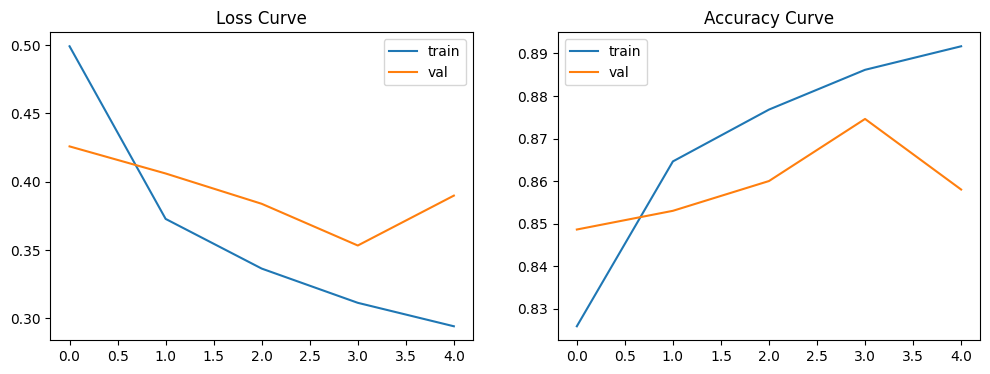

In [7]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
y_train, y_test = to_categorical(y_train), to_categorical(y_test)

model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test,y_test))

plt.figure(figsize=(12,4))
plt.subplot(1,2,1); plt.plot(history.history['loss'], label='train'); plt.plot(history.history['val_loss'], label='val'); plt.legend(); plt.title("Loss Curve")
plt.subplot(1,2,2); plt.plot(history.history['accuracy'], label='train'); plt.plot(history.history['val_accuracy'], label='val'); plt.legend(); plt.title("Accuracy Curve")
plt.show()

**Q.10 You are working on a project for a bank that wants to automatically detect fraudulent transactions. The dataset is large, imbalanced, and contains structured features like transaction amount, merchant ID, and customer location. The goal is to classify each transaction as fraudulent or legitimate. Explain your real-time data science workflow:**

**- How would you design a deep learning model (perceptron or multilayer NN)?**

**- Which activation function and loss function would you use, and why?**

**- How would you train and evaluate the model, considering class imbalance?**

**- Which optimizer would be suitable, and how would you prevent overfitting?**

→ Fraud Detection Real-Time Data Science Workflow (Bank Transactions):
1. Model Design:
- Use a multilayer NN with dense layers.
- Input: Structured features (transaction amount, merchant ID, customer location).
- Output: Binary classification (fraud vs legitimate).
2. Activation & Loss:
- Hidden layers: ReLU (fast, avoids vanishing gradient).
- Output: Sigmoid (binary classification).
- Loss: Binary Cross-Entropy (handles probabilities).
3. Handling Class Imbalance:
- Use class weights or oversampling (SMOTE).
- Monitor Precision, Recall, & F1-score (not just accuracy).
4. Optimizer & Overfitting Prevention:
- Optimizer: Adam (adaptive learning, efficient).
- Techniques: Dropout, early stopping, regularization.
5. Business Impact:
- Early fraud detection reduces financial loss.
- Improves customer trust & operational efficiency.